In [3]:
%pip install pandas
%pip install geopandas
%pip install pyproj

  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/12.8 MB 12.6 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.8 MB 22.1 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.8 MB 22.1 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.8 MB 11.3 MB/s eta 0:00:01
   ---------------------------- ----------- 9.2/12.8 MB 9.8 MB/s eta 0:00:01
   ------------------------------- -------- 10.0/12.8 MB 8.7 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.8 MB 7.7 MB/s eta 0:00:01
   ------------------------------------ --- 11.5/12.8 MB 7.2 MB/s eta 0:00:01
   --------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ------ --------------------------------- 3.1/19.2 MB 18.5 MB/s eta 0:00:01
   ------------- -------------------------- 6.6/19.2 MB 25.2 MB/s eta 0:00:01
   --------------- ------------------------ 7.6/19.2 MB 13.8 MB/s eta 0:00:01
   ------------------ --------------------- 8.7/19.2 MB 10.7 MB/s eta 0:00:01
   ------------------- -------------------- 9.2/19.2 MB 9.7 MB/s eta 0:00:02
   -------------------- ------------------- 10.0/19.2 MB 8.4 MB/s eta 0:00:02
   --------------------- ------------------ 10.5/19.2 MB 7.9 MB/s eta 0:00:02
   ------------------------ --------------- 11.5/19.2 MB 7.1 MB/s eta 0:00:02
   ------------------------- -------------- 12.3/19.2 MB 6.7 MB/s eta 0:00:02
   -------------------------- ------------- 12.8/19.2 MB 6.5 MB/s eta 0:00:01
   ---------------------------- ----------- 13.9/19.2 MB 6.1 MB/s eta 0:00:01
   ------------------------------ --------- 14.7/19.2 MB 5.9 MB/s eta 0:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pyproj import CRS

ModuleNotFoundError: No module named 'pandas'

LOAD DATA

Trail Data Loaded!


<Axes: >

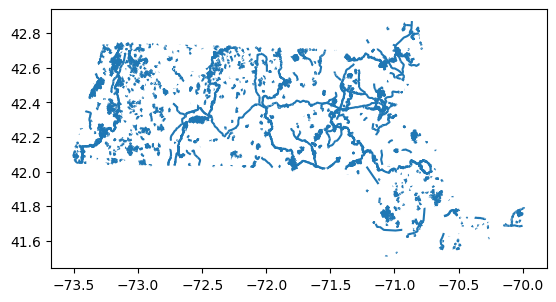

In [4]:
#Load Massachusetts Trail Data
trails = gpd.read_file("MA_State_Trails.geojson")
print("Trail Data Loaded!")
#Set global CRS
PROJECTION = trails.crs
trails.plot()

In [5]:
#Select by Name
def get_trail_by_name(geodataframe, name):
    return geodataframe[geodataframe["name"] == name]

iNaturalist API

Bounding Box, SW: (-72.62998167323978, 42.329292943867486) NE: (-72.46336871872809, 42.369992539971186)


0                 Coral Saucer
1               Dryad's Saddle
2            flocculose inkcap
3                 black locust
4      White-breasted Nuthatch
                ...           
195          Resinous Polypore
196         Woolly Alder Aphid
197        Isabella Tiger Moth
198                   Fallfish
199         Large Milkweed Bug
Name: species_guess, Length: 200, dtype: object

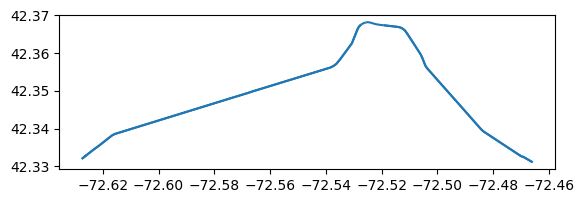

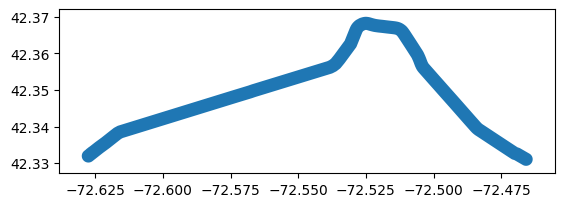

In [9]:
TRAIL_BUFFER = 200 #meters

#Select trail
trail = get_trail_by_name(trails, 'Norwottuck Rail Trail')
trail.plot()
#Add buffer:
trail = trail.to_crs(epsg=5070) #to metered projection
trail = gpd.GeoDataFrame(geometry=trail.buffer(TRAIL_BUFFER), crs=trail.crs)
trail = trail.dissolve()
trail = trail.to_crs(crs=PROJECTION) #back to original CRS
trail.plot()

#Get bounding box
SW_Lng, SW_Lat, NE_Lng, NE_Lat = trail.total_bounds
print(f"Bounding Box, SW: ({SW_Lng}, {SW_Lat}) NE: ({NE_Lng}, {NE_Lat})")

from datetime import datetime
curr_month = datetime.now().month
if curr_month == 1:
    last_month = 12
else:
    last_month = curr_month - 1
if curr_month == 12:
    next_month = 1
else:
    next_month = curr_month + 1

#Send url request
import requests


iNat_url = "https://api.inaturalist.org/v1/observations"
params = {
    "swlng": SW_Lng,
    "swlat": SW_Lat,
    "nelng": NE_Lng,
    "nelat": NE_Lat,      
    "quality_grade": "research",
    "per_page": 200,
    "page": 1,
    "month": [last_month, curr_month, last_month],        
    "year": [2022, 2023, 2024],     # last 3 years
    "order_by": "observed_on"
}

r = requests.get(iNat_url, params=params)
data = r.json()
observations = pd.json_normalize(data["results"])
species = observations["species_guess"]
display(species)

In [10]:
r.url

'https://api.inaturalist.org/v1/observations?swlng=-72.62998167323978&swlat=42.329292943867486&nelng=-72.46336871872809&nelat=42.369992539971186&quality_grade=research&per_page=200&page=1&month=9&month=10&month=9&year=2022&year=2023&year=2024&order_by=observed_on'